In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from matplotlib import cm

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.weight"] = "bold"
plt.rcParams["font.size"] = "12"

In [3]:
vizwiz_train = pd.read_csv('../../data/three_vote_threshold/vizwiz_skill_typ_train.csv', skipinitialspace=True, engine='python')
vizwiz_val = pd.read_csv('../../data/three_vote_threshold/vizwiz_skill_typ_val.csv', skipinitialspace=True, engine='python')
vizwiz_test = pd.read_csv('../../data/three_vote_threshold/vizwiz_skill_typ_test.csv', skipinitialspace=True, engine='python')

vqa_train = pd.read_csv('../../data/three_vote_threshold/vqa_skill_typ_train.csv', skipinitialspace=True, engine='python')
vqa_val = pd.read_csv('../../data/three_vote_threshold/vqa_skill_typ_val.csv', skipinitialspace=True, engine='python')
vqa_test = pd.read_csv('../../data/three_vote_threshold/vqa_skill_typ_test.csv', skipinitialspace=True, engine='python')

vqa_train['QID'] = vqa_train['QID'].astype(str)
vqa_val['QID'] = vqa_val['QID'].astype(str)
vqa_test['QID'] = vqa_test['QID'].astype(str)

vizwiz = pd.concat([vizwiz_train, vizwiz_val, vizwiz_test])
vqa = pd.concat([vqa_train, vqa_val, vqa_test])
df = pd.concat([vizwiz, vqa])

vizwiz = vizwiz[['TXT', 'OBJ', 'COL', 'CNT', 'OTH']]
vqa = vqa[['TXT', 'OBJ', 'COL', 'CNT', 'OTH']]

# all crowdsourced data
# df = pd.read_csv('../../data/VizWiz_VQA_Skills_Data.csv', engine='python')

In [3]:
df.columns

Index(['Unnamed: 0', 'QID', 'TXT', 'OBJ', 'COL', 'CNT', 'OTH', 'SRC_DATASET',
       'ANS_TYP', 'IMG', 'QSN', 'ANS1', 'ANS2', 'ANS3', 'ANS4', 'ANS5', 'ANS6',
       'ANS7', 'ANS8', 'ANS9', 'ANS10', 'NUM_UNIQUE_ANS',
       'NUM_MOST_COMMON_ANS', 'split'],
      dtype='object')

In [4]:
len(df)  # 3 rows not in previous train/test/splits are ignored

27260

In [5]:
df['QID'].nunique()

27260

In [6]:
df['SRC_DATASET'].unique()

array(['VizWiz', 'VQA'], dtype=object)

#### figure 2, dist of skill combinations

In [4]:
# none of the above - no agreed skill label
dset = vqa
(len(dset.loc[(dset['OBJ'] < 3) 
           & (dset['COL'] < 3) 
           & (dset['TXT'] < 3)
           & (dset['CNT'] < 3)
           & (dset['OTH'] < 3)]) / len(dset) ) # * 100

0.00834326579261025

In [5]:
# percentage of QA with a single skill
dset = vizwiz

obj = (dset.loc[(dset['OBJ'] >= 3) 
           & (dset['COL'] < 3) 
           & (dset['TXT'] < 3)
           & (dset['CNT'] < 3)
           & (dset['OTH'] < 3)])
col = (dset.loc[(dset['OBJ'] < 3) 
           & (dset['COL'] >= 3) 
           & (dset['TXT'] < 3)
           & (dset['CNT'] < 3)
           & (dset['OTH'] < 3)])
txt = (dset.loc[(dset['OBJ'] >= 3) 
           & (dset['COL'] < 3) 
           & (dset['TXT'] >= 3)
           & (dset['CNT'] < 3)
           & (dset['OTH'] < 3)])
cnt = (dset.loc[(dset['OBJ'] >= 3) 
           & (dset['COL'] < 3) 
           & (dset['TXT'] < 3)
           & (dset['CNT'] >= 3)
           & (dset['OTH'] < 3)])
oth = (dset.loc[(dset['OBJ'] >= 3) 
           & (dset['COL'] < 3) 
           & (dset['TXT'] < 3)
           & (dset['CNT'] < 3)
           & (dset['OTH'] >= 3)])

(len(obj) + len(col) + len(txt) + len(cnt) + len(oth)) / len(dset)

0.7619454692702241

In [224]:
len(col)

632

In [225]:
len(one_skill(vizwiz, 'COL', ratio=False))

632

In [10]:
def one_skill(dset, s, ratio=True):
    skills = ['OBJ', 'COL', 'TXT', 'CNT', 'OTH']
    mute = list(set(skills) - set([s]))
    df = (dset.loc[(dset[s] >= 3) 
                   & (dset[mute[0]] < 3) 
                   & (dset[mute[1]] < 3)
                   & (dset[mute[2]] < 3) 
                   & (dset[mute[3]] < 3)])
    if ratio:
        r = len(df)/len(dset)
        print(f'{s}: {r}')
        return r
    else: return df
    
def one_skill_nonexclusive(dset, s, ratio=True):
    skills = ['OBJ', 'COL', 'TXT', 'CNT', 'OTH']
    df = dset.loc[(dset[s] >= 3)]
    if ratio:
        r = len(df)/len(dset)
        print(f'{s}: {r}')
        return r
    else: return df

    
def two_skills(dset, s1, s2, ratio=True):
    skills = ['OBJ', 'COL', 'TXT', 'CNT', 'OTH']
    mute = list(set(skills) - set([s1,s2]))
    df = (dset.loc[(dset[s1] >= 3) & (dset[s2] >= 3) 
                   & (dset[mute[0]] < 3) 
                   & (dset[mute[1]] < 3) 
                   & (dset[mute[2]] < 3)])
    if ratio:
        r = len(df)/len(dset)
        print(f'{s1} & {s2}: {r}')
        return r
    else: return df
    
def two_skill_nonexclusive(dset, s1, s2, ratio=True):
    skills = ['OBJ', 'COL', 'TXT', 'CNT', 'OTH']
    df = dset.loc[(dset[s1] >= 3) & (dset[s2] >= 3)]
    if ratio:
        r = len(df)/len(dset)
        print(f'{s1} & {s2}: {r}')
        return r
    else: return df

def three_skills(dset, s1, s2, s3, ratio=True):
    skills = ['OBJ', 'COL', 'TXT', 'CNT', 'OTH']
    mute = list(set(skills) - set([s1,s2,s3]))
    df = (dset.loc[(dset[s1] >= 3) & (dset[s2] >= 3) & (dset[s3] >= 3)
                   & (dset[mute[0]] < 3)
                   & (dset[mute[1]] < 3)])
    if ratio:
        r = len(df)/len(dset)
        print(f'{s1} & {s2} & {s3}: {r}')
        return r
    else: return df

def three_skills_nonexclusive(dset, s1, s2, s3, ratio=True):
    skills = ['OBJ', 'COL', 'TXT', 'CNT', 'OTH']
    mute = list(set(skills) - set([s1,s2,s3]))
    df = (dset.loc[(dset[s1] >= 3) & (dset[s2] >= 3) & (dset[s3] >= 3)])
    if ratio:
        r = len(df)/len(dset)
        print(f'{s1} & {s2} & {s3}: {r}')
        return r
    else: return df

def four_skills(dset, s1, s2, s3, s4, ratio=True):
    skills = ['OBJ', 'COL', 'TXT', 'CNT', 'OTH']
    mute = list(set(skills) - set([s1,s2,s3,s4]))
    df = (dset.loc[(dset[s1] >= 3) & (dset[s2] >= 3) & (dset[s3] >= 3) & (dset[s4] >= 3)
                   & (dset[mute[0]] < 3)])
    if ratio:
        r = len(df)/len(dset)
        print(f'{s1} & {s2} & {s3} & {s4}: {r}')
        return r
    else: return df

In [229]:
# ratio of 1 skill only
dset = vqa
(len(one_skill(dset, 'OBJ', False)) + 
len(one_skill(dset, 'COL', False)) + 
len(one_skill(dset, 'TXT', False)) + 
len(one_skill(dset, 'CNT', False)) + 
len(one_skill(dset, 'OTH', False)) ) / len(dset)

0.6313071116408423

In [230]:
# single skill dist
dset = vqa
for s in skills: 
    one_skill(dset, s)

OBJ: 0.619388160508542
COL: 0.004370282081843465
TXT: 0.002582439411998411
CNT: 0.004966229638458482
OTH: 0.0


In [231]:
dset = vqa

# two skills (5 choose 2) ratios
two_skills(dset, 'OBJ', 'COL')
two_skills(dset, 'OBJ', 'TXT')
two_skills(dset, 'OBJ', 'CNT')
two_skills(dset, 'OBJ', 'OTH')
two_skills(dset, 'COL', 'TXT')
two_skills(dset, 'COL', 'CNT')
two_skills(dset, 'COL', 'OTH')
two_skills(dset, 'TXT', 'CNT')
two_skills(dset, 'TXT', 'OTH')
two_skills(dset, 'CNT', 'OTH')

OBJ & COL: 0.15196662693682955
OBJ & TXT: 0.04529201430274136
OBJ & CNT: 0.14382201032975764
OBJ & OTH: 0.0009932459276916965
COL & TXT: 0.0
COL & CNT: 0.0001986491855383393
COL & OTH: 0.0
TXT & CNT: 0.0003972983710766786
TXT & OTH: 0.0
CNT & OTH: 0.0


0.0

In [35]:
# ratio of 2 skills
dset = vizwiz
(
len(two_skills(dset, 'OBJ', 'COL', False)) + 
len(two_skills(dset, 'OBJ', 'TXT', False)) + 
len(two_skills(dset, 'OBJ', 'CNT', False)) + 
len(two_skills(dset, 'OBJ', 'OTH', False)) + 
len(two_skills(dset, 'COL', 'TXT', False)) + 
len(two_skills(dset, 'COL', 'CNT', False)) + 
len(two_skills(dset, 'COL', 'OTH', False)) + 
len(two_skills(dset, 'TXT', 'CNT', False)) + 
len(two_skills(dset, 'TXT', 'OTH', False)) +
len(two_skills(dset, 'CNT', 'OTH', False)) ) / len(dset)

0.5934041212993791

In [7]:
# ratio of 3 skills
dset = vqa
( 
len(three_skills(dset, 'OBJ', 'COL', 'TXT', False)) + 
len(three_skills(dset, 'OBJ', 'COL', 'CNT', False)) + 
len(three_skills(dset, 'OBJ', 'COL', 'OTH', False)) + 
len(three_skills(dset, 'OBJ', 'TXT', 'CNT', False)) + 
len(three_skills(dset, 'OBJ', 'TXT', 'OTH', False)) + 
len(three_skills(dset, 'OBJ', 'CNT', 'OTH', False)) + 
len(three_skills(dset, 'OBJ', 'CNT', 'TXT', False)) + 
len(three_skills(dset, 'COL', 'TXT', 'CNT', False)) + 
len(three_skills(dset, 'COL', 'TXT', 'OTH', False)) + 
len(three_skills(dset, 'TXT', 'CNT', 'OTH', False)) ) / len(dset)

0.025029797377830752

In [12]:
# ratio of 3 skills, exlucidng OBJ
dset = vqa
( len(three_skills_nonexclusive(dset, 'COL', 'TXT', 'CNT', False)) ) / len(dset)

0.0

In [57]:
# three skill combinations
dset = vqa

three_skills(dset, 'OBJ', 'TXT', 'OTH')
three_skills(dset, 'OBJ', 'COL', 'TXT')
three_skills(dset, 'OBJ', 'TXT', 'CNT')
three_skills(dset, 'OBJ', 'CNT', 'OTH')
three_skills(dset, 'OBJ', 'COL', 'OTH')
three_skills(dset, 'COL', 'TXT', 'CNT')
three_skills(dset, 'COL', 'CNT', 'OTH')
three_skills(dset, 'TXT', 'CNT', 'OTH')
three_skills(dset, 'COL', 'CNT', 'OTH')
three_skills(dset, 'COL', 'TXT', 'OTH')

OBJ & TXT & OTH: 0.0
OBJ & COL & TXT: 0.0013905442987683751
OBJ & TXT & CNT: 0.007350019864918554
OBJ & CNT & OTH: 0.0
OBJ & COL & OTH: 0.0
COL & TXT & CNT: 0.0
COL & CNT & OTH: 0.0
TXT & CNT & OTH: 0.0
COL & CNT & OTH: 0.0
COL & TXT & OTH: 0.0


0.0

In [47]:
# ratio of four skills - 5 choose 4 = 5
dset = vizwiz
skills = ['OBJ', 'COL', 'TXT', 'CNT', 'OTH']
(
len(four_skills(dset, 'OBJ', 'COL', 'TXT', 'CNT', False)) + 
len(four_skills(dset, 'OBJ', 'TXT', 'CNT', 'OTH', False)) +
len(four_skills(dset, 'OBJ', 'COL', 'CNT', 'OTH', False)) +
len(four_skills(dset, 'COL', 'TXT', 'CNT', 'OTH', False)) + 
len(four_skills(dset, 'OBJ', 'COL', 'TXT', 'OTH', False))
) / len(dset)

8.99847026005579e-05

OBJ: 0.9325114730495816
COL: 0.22064249077656797
TXT: 0.45329793935031043
CNT: 0.014892468280392333
OTH: 8.99847026005579e-05
OBJ: 0.9791418355184743
COL: 0.16686531585220502
TXT: 0.05701231624950338
CNT: 0.16567342073897498
OTH: 0.0009932459276916965
OBJ & TXT: 0.42328804103302436
OBJ & COL: 0.19180239359308918
OBJ & CNT: 0.01331773598488257
COL & TXT: 0.01120309547376946
TXT & CNT: 0.008548546747053002
COL & CNT: 0.0004499235130027895
OBJ & TXT: 0.05403257846642829
OBJ & COL: 0.1622963845848232
OBJ & CNT: 0.16011124354390147
COL & TXT: 0.0013905442987683751
TXT & CNT: 0.0077473182359952325
COL & CNT: 0.009137862534763607


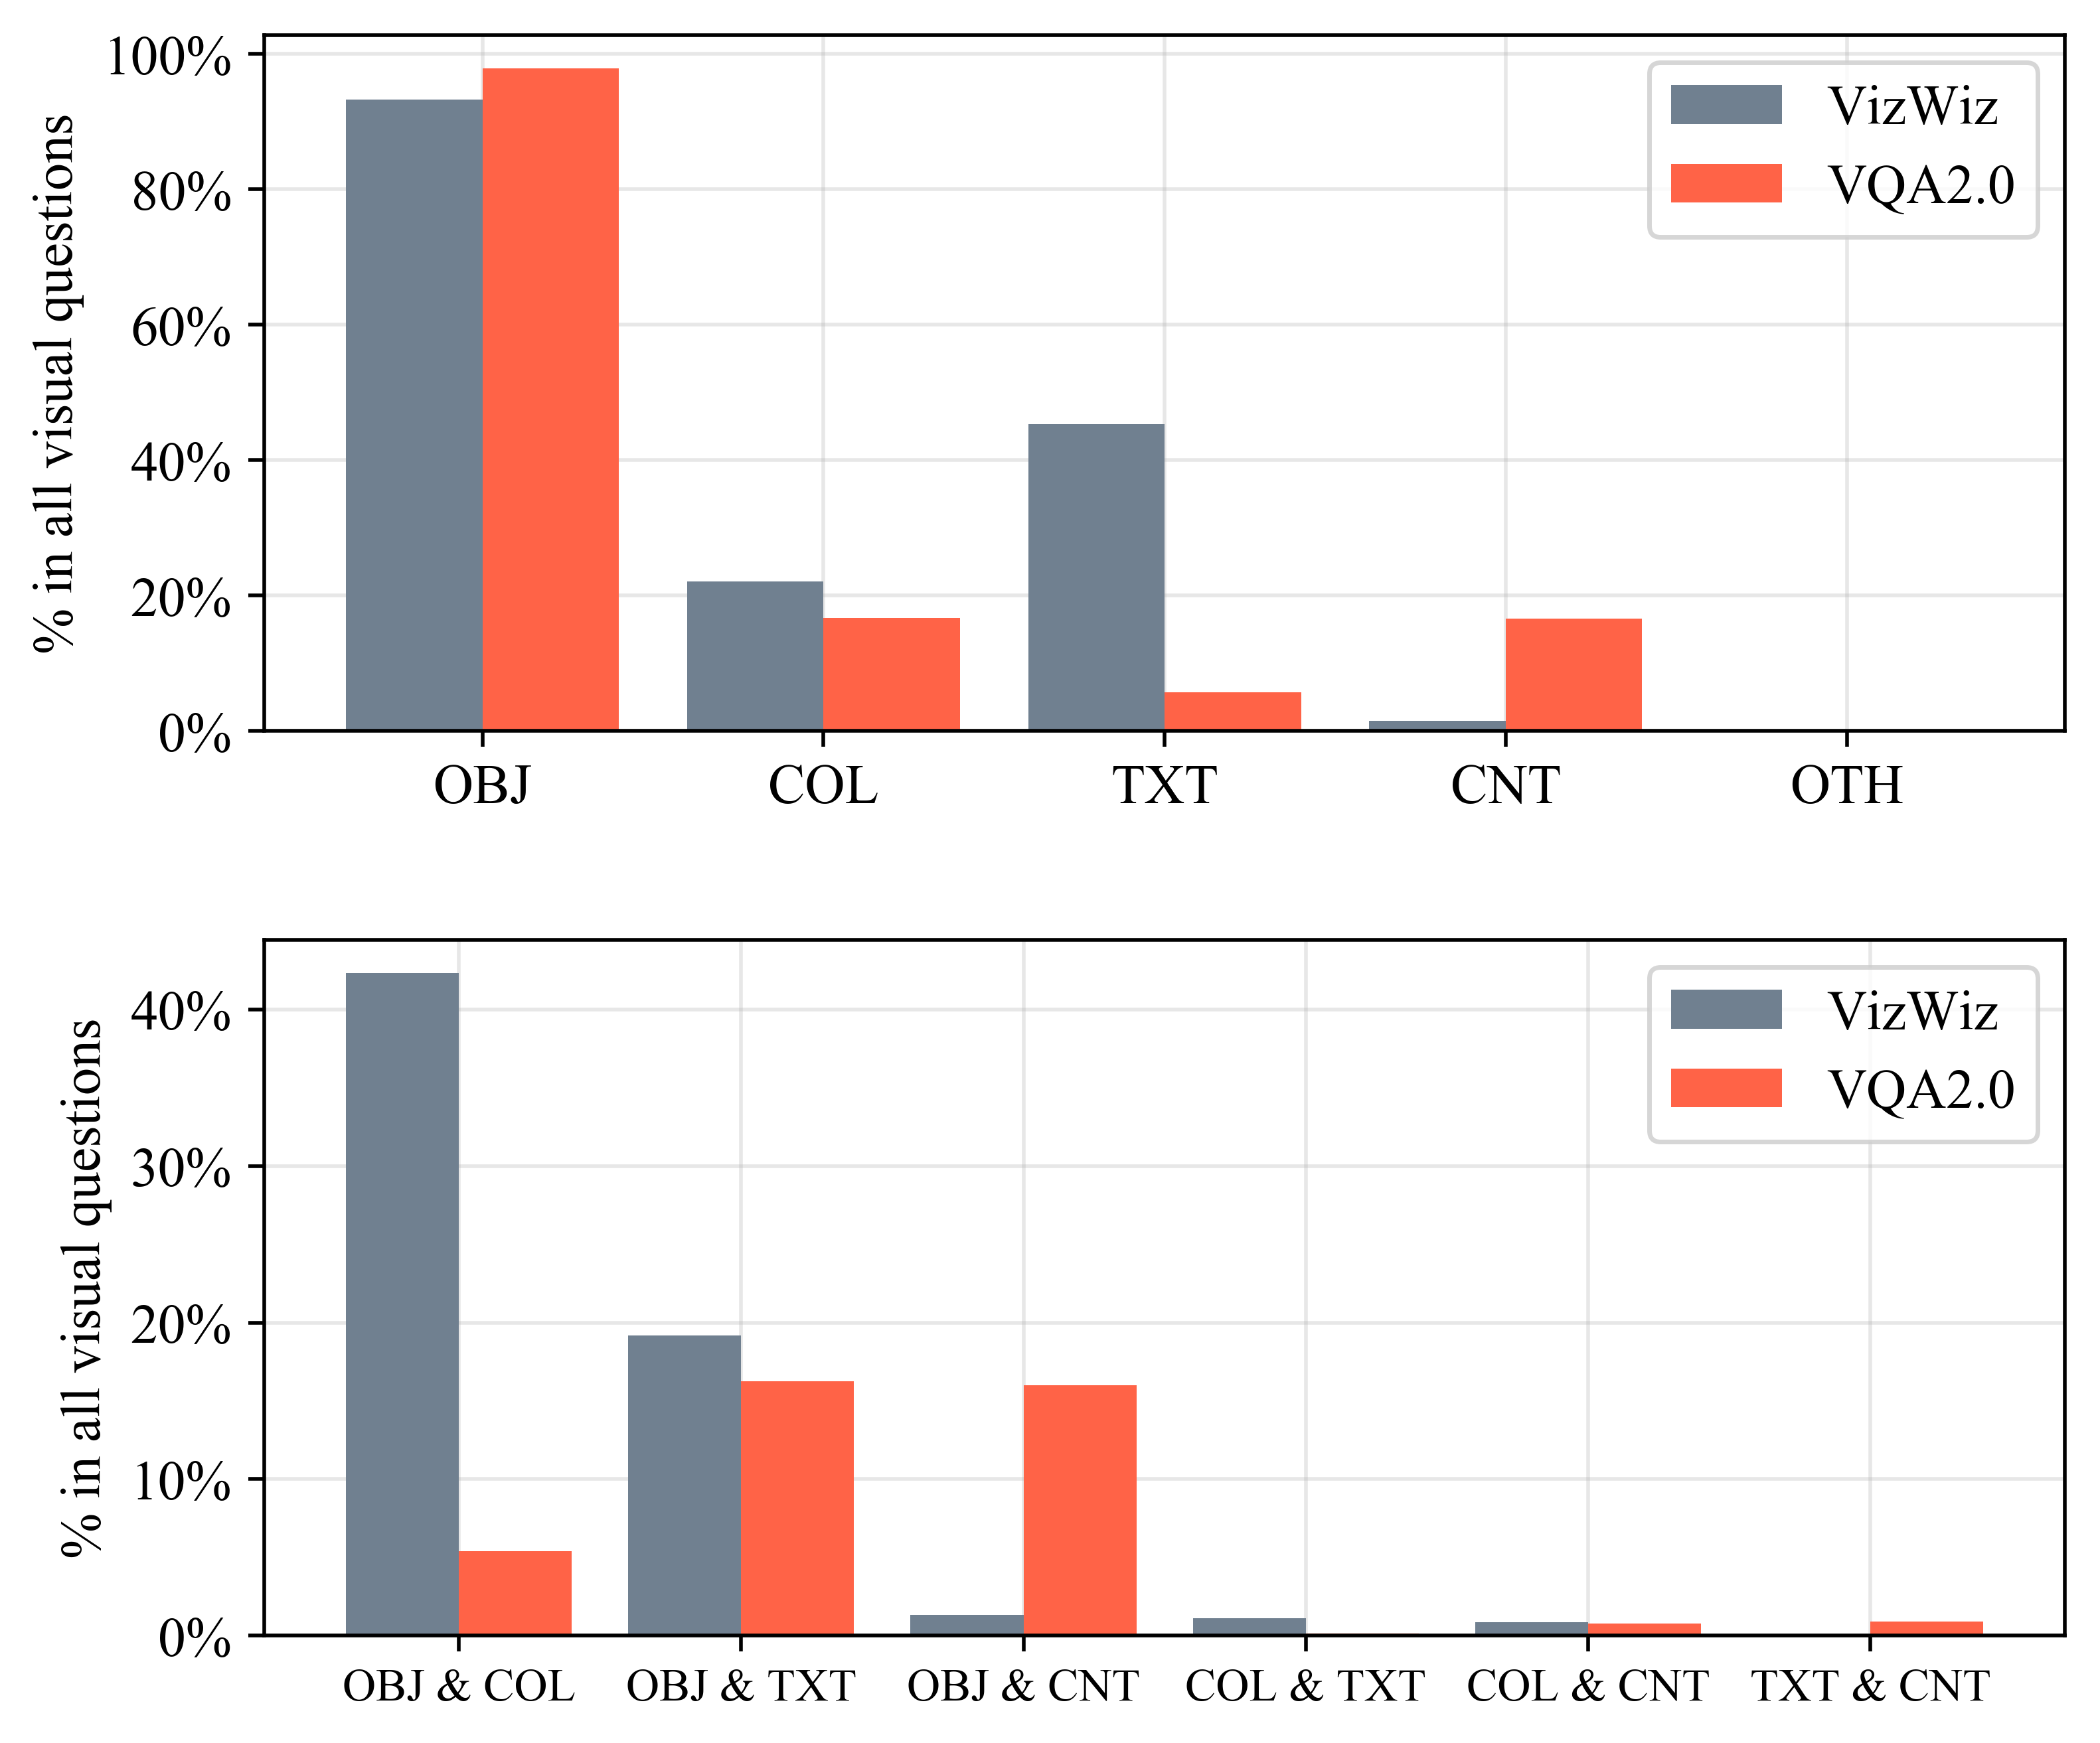

In [232]:
# one skill

fig = figure(num=None, figsize=(7, 10), dpi=500)
w = 0.4
itv = 0.2

skills = ['OBJ', 'COL', 'TXT', 'CNT', 'OTH']
_one_skill = np.arange(len(skills))
dset = vizwiz
vizwiz_data = [one_skill_nonexclusive(dset, 'OBJ'),
               one_skill_nonexclusive(dset, 'COL'), 
               one_skill_nonexclusive(dset, 'TXT'), 
               one_skill_nonexclusive(dset, 'CNT'),
               one_skill_nonexclusive(dset, 'OTH') ]
dset = vqa
vqa_data = [one_skill_nonexclusive(dset, 'OBJ'),
            one_skill_nonexclusive(dset, 'COL'), 
            one_skill_nonexclusive(dset, 'TXT'),
            one_skill_nonexclusive(dset, 'CNT'),
            one_skill_nonexclusive(dset, 'OTH') ]

one_skill_plot = fig.add_subplot(3,1,1, sharex=None, sharey=None)
one_skill_plot.grid(alpha=.3)
one_skill_plot.set_axisbelow(True)
one_skill_plot.bar(_one_skill-itv, vizwiz_data, width=w, alpha=1, label='VizWiz', color='slategray')
one_skill_plot.bar(_one_skill+itv, vqa_data, width=w, alpha=1, label='VQA2.0', color='tomato')
one_skill_plot.set_xticks(_one_skill)
one_skill_plot.set_xticklabels(skills)
#one_skill_plot.set_xlabel('Skill')
one_skill_plot.set_ylabel('% in all visual questions')

one_skill_plot_y_ticks = one_skill_plot.get_yticks()
one_skill_plot.set_yticklabels(['{:,.0%}'.format(y) for y in one_skill_plot_y_ticks])
# one_skill_plot.set_title('Distributions of skills')
one_skill_plot.legend()

# single skill
"""
single_skills = ['COL', 'TXT', 'CNT']
_single_skill = np.arange(len(single_skills))
dset = vizwiz
vizwiz_data = [0.4988161010260458, 0.49644830307813737, 0.004735595895816891]
vqa_data = [0.36666666666666664, 0.21666666666666665, 0.41666666666666663]
single_skill_plot = fig.add_subplot(3,1,2, sharex=None, sharey=None)
single_skill_plot.grid(alpha=.3)
single_skill_plot.set_axisbelow(True)
single_skill_plot.bar(_single_skill-itv, vizwiz_data, width=w, alpha=1, label='VizWiz', color='slategray')
single_skill_plot.bar(_single_skill+itv, vqa_data, width=w, alpha=1, label='VQA2.0', color='tomato')
single_skill_plot.set_xticks(_single_skill)
single_skill_plot.set_xticklabels(single_skills)
single_skill_plot_y_ticks = single_skill_plot.get_yticks()
single_skill_plot.set_yticklabels(['{:,.0%}'.format(y) for y in single_skill_plot_y_ticks])
single_skill_plot.legend()
#single_skill_plot.set_xlabel('Skill')
single_skill_plot.set_ylabel('% in single-skill visual questions')
"""
# two skills
two_skill_combinations = ['OBJ & COL', 
                          'OBJ & TXT', 'OBJ & CNT', 
                          'COL & TXT', 'COL & CNT', 'TXT & CNT']
_two_skill = np.arange(len(two_skill_combinations))
dset = vizwiz
vizwiz_data = [two_skill_nonexclusive(dset, 'OBJ', 'TXT'),
               two_skill_nonexclusive(dset, 'OBJ', 'COL'), 
               two_skill_nonexclusive(dset, 'OBJ', 'CNT'),
               two_skill_nonexclusive(dset, 'COL', 'TXT'), 
               two_skill_nonexclusive(dset, 'TXT', 'CNT'),
               two_skill_nonexclusive(dset, 'COL', 'CNT')]
dset = vqa
vqa_data = [two_skill_nonexclusive(dset, 'OBJ', 'TXT'),
            two_skill_nonexclusive(dset, 'OBJ', 'COL'), 
            two_skill_nonexclusive(dset, 'OBJ', 'CNT'),
            two_skill_nonexclusive(dset, 'COL', 'TXT'), 
            two_skill_nonexclusive(dset, 'TXT', 'CNT'),
            two_skill_nonexclusive(dset, 'COL', 'CNT'),
            ]
two_skill_plot = fig.add_subplot(3,1,2, sharex=None, sharey=None)
two_skill_plot.grid(alpha=.3)
two_skill_plot.set_axisbelow(True)
two_skill_plot.bar(_two_skill-itv, vizwiz_data, width=w, alpha=1, label='VizWiz', color='slategray')
two_skill_plot.bar(_two_skill+itv, vqa_data, width=w, alpha=1, label='VQA2.0', color='tomato')
two_skill_plot.set_xticklabels(two_skill_combinations)
two_skill_plot.set_xticks(_two_skill)
two_skill_plot_y_ticks = two_skill_plot.get_yticks()
two_skill_plot.set_yticklabels(['{:,.0%}'.format(y) for y in two_skill_plot_y_ticks])
# two_skill_plot.set_title('Combinations of skills')
two_skill_plot.legend()
#two_skill_plot.set_xlabel('Skill')
two_skill_plot.tick_params(axis='x', labelsize=10)
two_skill_plot.set_ylabel('% in all visual questions')

plt.subplots_adjust(hspace=.3)
plt.show()

In [238]:
one_skill(vizwiz, 'COL')

COL: 0.028435166021776297


0.028435166021776297

In [242]:
len(col) / len(vizwiz)

0.028435166021776297

In [233]:
# approximately $5.7\%$ of VizWiz and $1.2\%$ of VQA required only one skill.
dset = vizwiz
vizwiz_single_skill = [one_skill(dset, 'COL'), 
               one_skill(dset, 'TXT'), one_skill(dset, 'CNT'),
               one_skill(dset, 'OTH') ]
print(np.sum(np.array(vizwiz_single_skill)))
dset = vqa
vqa_single_skill = [one_skill(dset, 'COL'), 
               one_skill(dset, 'TXT'), one_skill(dset, 'CNT'),
               one_skill(dset, 'OTH') ]
print(np.sum(np.array(vqa_single_skill)))

COL: 0.028435166021776297
TXT: 0.02830018896787546
CNT: 0.0002699541078016737
OTH: 0.0
0.05700530909745343
COL: 0.004370282081843465
TXT: 0.002582439411998411
CNT: 0.004966229638458482
OTH: 0.0
0.011918951132300359


In [80]:
# in single skill questions
dset = vizwiz
print('vizwiz, color in single skill questions: ', 0.028435166021776297 /  0.05700530909745343)
print('text in single skill questions:', 0.02830018896787546 / 0.05700530909745343)
print('counting in single skill questions:', 0.0002699541078016737 / 0.05700530909745343)

vizwiz, color in single skill questions:  0.4988161010260458
text in single skill questions: 0.49644830307813737
counting in single skill questions: 0.004735595895816891


In [81]:
dset = vqa 
print('vqa, color in single skill questions: ', 0.004370282081843465 / 0.011918951132300359)
print('text in single skill questions:', 0.002582439411998411 / 0.011918951132300359)
print('counting in single skill questions:', 0.004966229638458482 / 0.011918951132300359)

vqa, color in single skill questions:  0.36666666666666664
text in single skill questions: 0.21666666666666665
counting in single skill questions: 0.41666666666666663


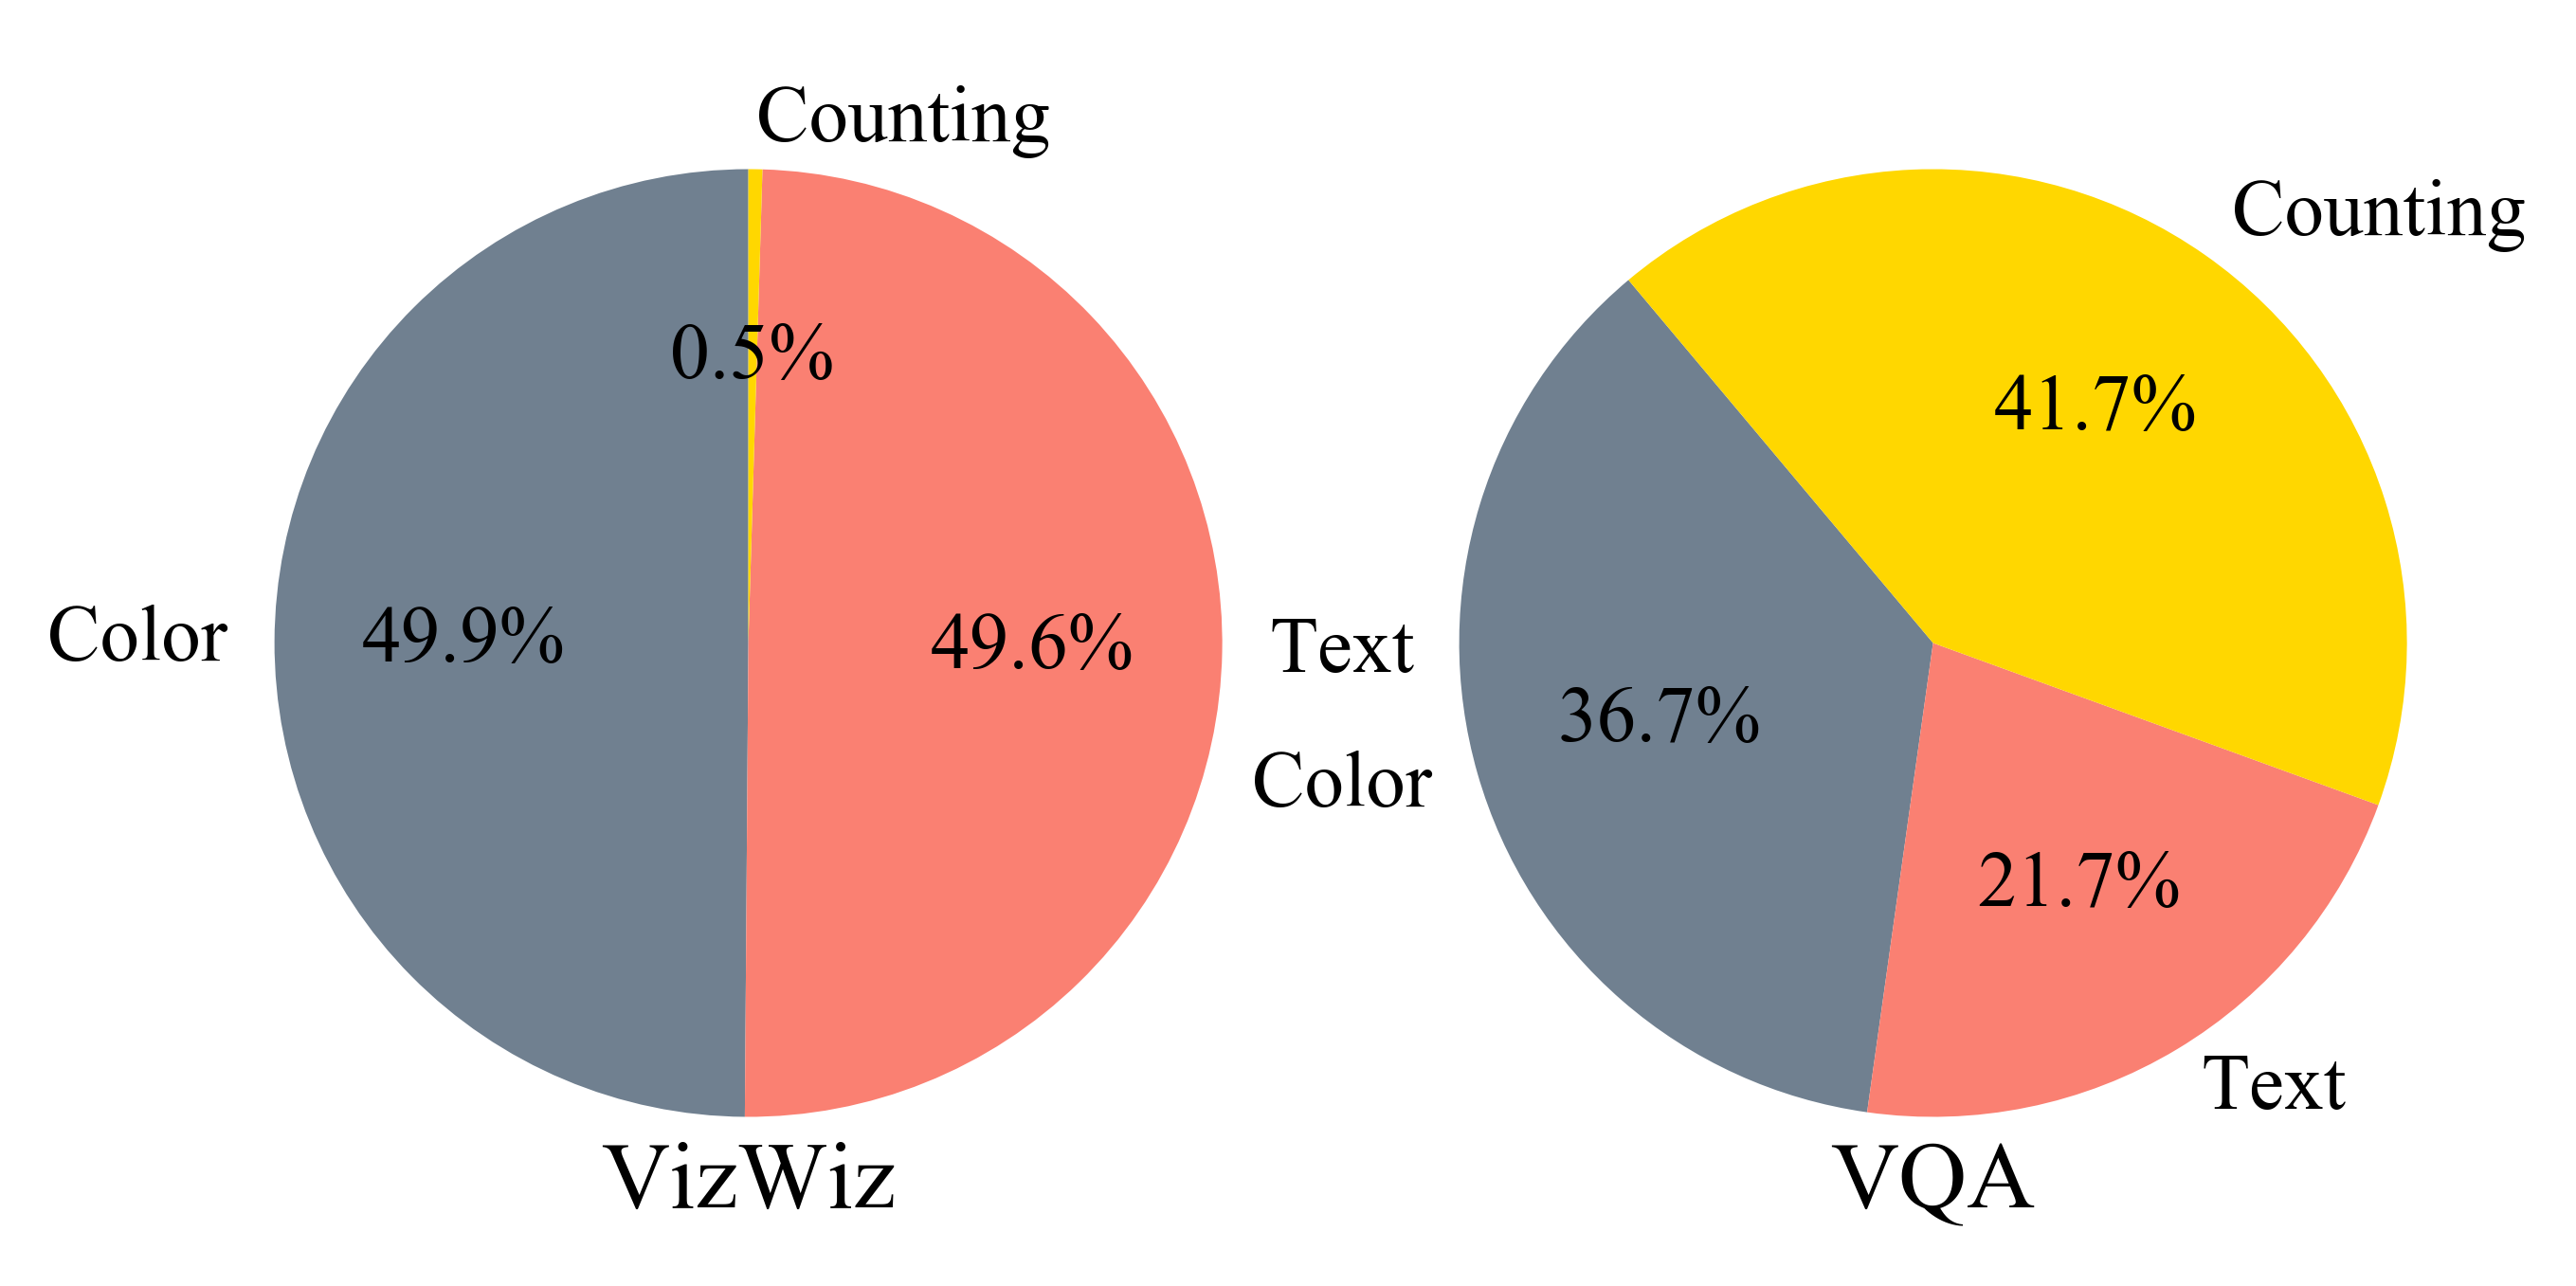

In [197]:
# pie charts of single skill distribution

labels = 'Color', 'Text', 'Counting'
vizwiz_sizes = [49.8816, 49.6448, 0.4736]
vqa_sizes = [36.6667, 21.6667, 41.6667]

fig = plt.figure(num=None, figsize=(5,5), dpi=500)

ax1 = fig.add_axes([0, 0, .5, .5], aspect=1)
ax1.pie(vizwiz_sizes, labels=labels, autopct='%1.1f%%', radius=1.,
        shadow=False, startangle=90, colors=['slategray', 'salmon', 'gold'])
ax2 = fig.add_axes([.5, .0, .5, .5], aspect=1)
ax2.pie(vqa_sizes, labels=labels, autopct='%1.1f%%', radius=1.,
        shadow=False, startangle=130, colors=['slategray', 'salmon', 'gold'])
ax1.set_title('VizWiz', y=-0.01)
ax2.set_title('VQA', y=-0.01)

# plt.subplots_adjust(wspace=.9)
plt.show()

In [198]:
# ratio of multi skill questions 
dset = vizwiz
vizwiz_data = [two_skill_nonexclusive(dset, 'COL', 'TXT'),
            two_skill_nonexclusive(dset, 'TXT', 'CNT'),
            two_skill_nonexclusive(dset, 'COL', 'CNT'),
            ]
dset = vqa
vqa_data = [two_skill_nonexclusive(dset, 'COL', 'TXT'),
            two_skill_nonexclusive(dset, 'TXT', 'CNT'),
            two_skill_nonexclusive(dset, 'COL', 'CNT'),
            ]

COL & TXT: 0.01120309547376946
TXT & CNT: 0.008548546747053002
COL & CNT: 0.0004499235130027895
COL & TXT: 0.0013905442987683751
TXT & CNT: 0.0077473182359952325
COL & CNT: 0.009137862534763607


In [199]:
vizwiz.head(1)

,Unnamed: 0,QID,TXT,OBJ,COL,CNT,OTH,SRC_DATASET,ANS_TYP,IMG,...,ANS4,ANS5,ANS6,ANS7,ANS8,ANS9,ANS10,NUM_UNIQUE_ANS,NUM_MOST_COMMON_ANS,split
0,10756,VizWiz_train_000000000000.jpg,4,3,0,0,0,VizWiz,other,VizWiz_train_000000000000.jpg,...,basil,basil leaves,basil leaves,basil leaves,basil leaves,basil leaves,basil,2,7,train


In [245]:
vizwiz = vizwiz[['TXT', 'OBJ', 'COL', 'CNT', 'OTH']]
vqa = vqa[['TXT', 'OBJ', 'COL', 'CNT', 'OTH']]

vizwiz_txt = vizwiz.loc[(vizwiz['TXT'] >= 3) & (vizwiz['COL'] < 3) & (vizwiz['CNT'] < 3)]
vizwiz_col = vizwiz.loc[(vizwiz['COL'] >= 3) & (vizwiz['TXT'] < 3) & (vizwiz['CNT'] < 3)]
vizwiz_cnt = vizwiz.loc[(vizwiz['CNT'] >= 3) & (vizwiz['TXT'] < 3) & (vizwiz['COL'] < 3)]

len(vizwiz_txt)/len(vizwiz) + len(vizwiz_col)/len(vizwiz) + len(vizwiz_cnt)/len(vizwiz)

0.6486997210474219

In [ ]:
vqa_txt = vqa.loc[(vqa['TXT'] >= 3) & (vqa['COL'] < 3) (vqa['CNT'] < 3)]
vqa_col = vqa.loc[(vqa['COL'] >= 3) & (vqa['TXT'] < 3) (vqa['CNT'] < 3)]
vqa_cnt = vqa.loc[(vqa['CNT'] >= 3) & (vqa['COL'] < 3) (vqa['TXT'] < 3)]

len(vqa_txt)